In [11]:
import os, sys, time, math
import tensorflow as tf
# import tensorlayer as tl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import cv2
# import network, img_io
import glob
from skimage import color ,io

In [2]:
def Extract_Filenames(dirpath):
    """Get all the filenames of .csv in the given directory
    Args:
        dirpath(string): the directory to search for the files.
    Returns:
        list: a list of filenames
    """

    import glob
#     dirpath = './test_data/'
    file_lst = [f for f in glob.glob("{}*.png".format(dirpath))]
    file_lst = [file_lst[i].split('\\')[-1].split('/')[-1]
                for i in range(len(file_lst))]
    file_lst = sorted(file_lst)
    return file_lst

In [5]:
def import_images(dirpath = './LDR data/'):
    # read data from <data> folder
    filenames = Extract_Filenames(dirpath)
    X = np.zeros((len(filenames), 256, 256,3))
    i=0   
    for name in filenames:
        image = cv2.imread(dirpath+name)

        
        rgb = color.gray2rgb(image)
#         rgb =  cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) # turn into grayscale
        X[i,:,:,:] = rgb
        i +=1
    return X

In [6]:
testing = import_images(dirpath = './testing/')
testing.shape

(11, 256, 256, 3)

In [12]:
for i in range(testing.shape[0]):
    io.imsave('./testing/result_'+str(i)+'.jpg', testing[i])

Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 130.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 130.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 130.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 130.0]. Convert image to uint8 prior to saving to suppress this warning.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


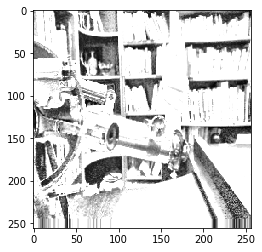

In [10]:
plt.imshow(testing[0]/testing[1].max())